In [1]:
from scipy.io import arff
from scipy.spatial.distance import euclidean
import pandas as pd
import joblib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder , StandardScaler , PolynomialFeatures , MinMaxScaler
from sklearn.model_selection  import train_test_split , cross_val_score , KFold
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle

from keras.regularizers import l1_l2
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import Sequential, Model
from keras.layers import LeakyReLU, Activation, Input, Dense, Dropout, Concatenate, BatchNormalization
from keras.models import load_model

In [2]:
data_set = 'diabetes' # diabetes , german_credit

In [3]:
# load
if data_set == 'diabetes':
    BB_clf = joblib.load("/home/odedrot/DL_ex_4/diabetes_trained_rf_scaled.joblib")
    GAN_gen = load_model('/home/odedrot/DL_ex_4/part2_Diabetes_generator_3ok.h5', compile=False)
    data = arff.loadarff('/home/odedrot/DL_ex_4/Assignment 4 files/diabetes.arff')
    df = pd.DataFrame(data[0])
    np.random.seed()
    df = df.reindex(np.random.permutation(df.index))
    Ndata_points=len(df) # len(df)  for max
    df=df[0:Ndata_points] 
    X = pd.DataFrame()
    y = pd.DataFrame()
    X = df.drop(['class'], axis=1)
    y = df['class']  
    X = X.to_numpy()
    labelencoder = LabelEncoder()
    y = labelencoder.fit_transform(y)
    y = np.hstack(y)
    # # normalize feature space 
    sc = StandardScaler() # MinMaxScaler()  StandardScaler()
    X = sc.fit_transform(X) # use training data to fit and transform

In [4]:
batch_size = 1000
noise_dim = 10
noise_batch      = np.random.normal(0, 1, (batch_size, noise_dim))    
c_batch      = np.random.uniform(0, 1, (batch_size, 1))
c_batch = c_batch[:,0]
generated_features = GAN_gen.predict([noise_batch,c_batch]) # (32, 8)
y_label = BB_clf.predict_proba(generated_features)[:,0]

(array([2.63e+03, 5.00e+01, 3.50e+01, 3.10e+01, 2.80e+01, 1.90e+01,
        1.60e+01, 1.50e+01, 1.00e+01, 1.00e+01, 6.00e+00, 1.50e+01,
        6.00e+00, 7.00e+00, 4.00e+00, 8.00e+00, 7.00e+00, 1.00e+01,
        7.00e+00, 4.00e+00, 8.00e+00, 4.00e+00, 6.00e+00, 4.00e+00,
        9.00e+00, 7.00e+00, 7.00e+00, 4.00e+00, 4.00e+00, 1.00e+00,
        5.00e+00, 2.00e+00, 2.00e+00, 1.00e+00, 1.00e+00, 2.00e+00,
        4.00e+00, 6.00e+00, 4.00e+00, 3.00e+00, 4.00e+00, 4.00e+00,
        4.00e+00, 2.00e+00, 7.00e+00, 3.00e+00, 6.00e+00, 2.00e+00,
        5.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 3.00e+00, 1.00e+00,
        1.00e+00, 3.00e+00, 4.00e+00, 9.00e+00, 5.00e+00, 8.00e+00,
        4.00e+00, 1.00e+00, 4.00e+00, 2.00e+00, 6.00e+00, 5.00e+00,
        6.00e+00, 9.00e+00, 5.00e+00, 3.00e+00, 6.00e+00, 5.00e+00,
        6.00e+00, 8.00e+00, 8.00e+00, 6.00e+00, 1.10e+01, 1.00e+01,
        1.00e+01, 4.00e+00, 7.00e+00, 5.00e+00, 1.20e+01, 1.70e+01,
        2.00e+01, 6.00e+00, 1.80e+01, 1.50e+01, 

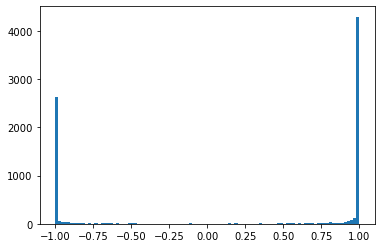

In [13]:
plt.hist(generated_features.flatten(), 100)


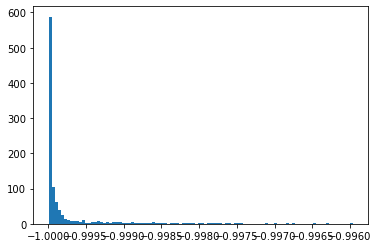

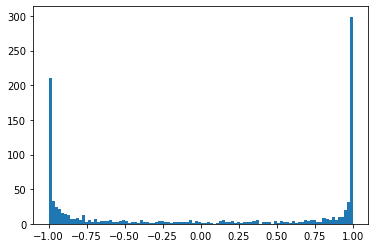

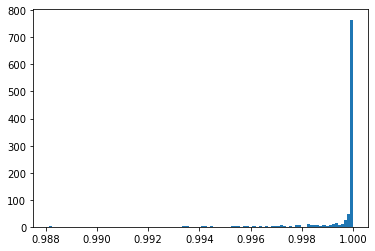

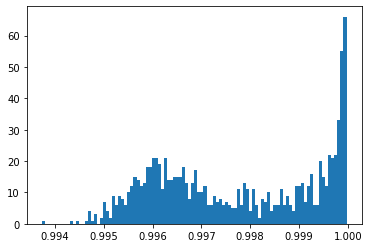

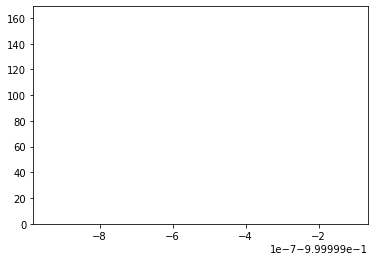

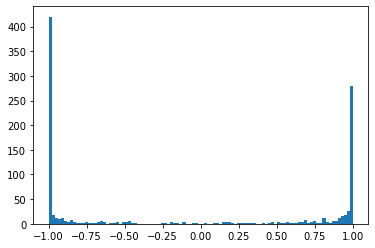

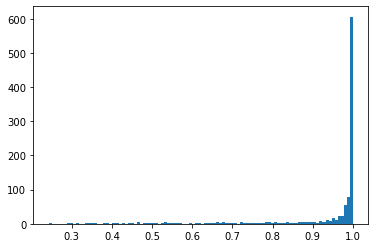

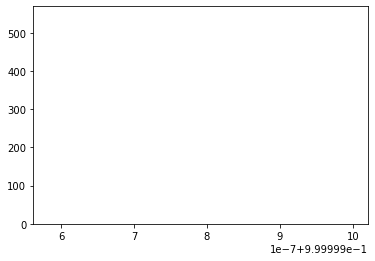

In [12]:
for i in range(generated_features.shape[1]):
    plt.hist(generated_features[:,i], 100)
    plt.show()



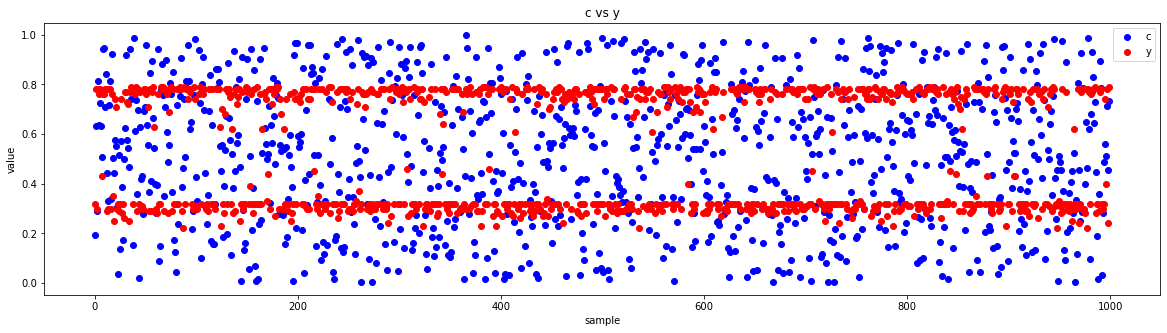

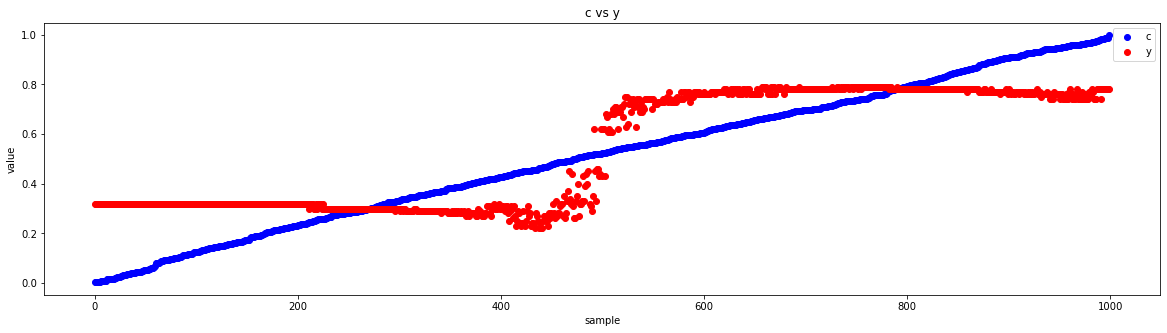

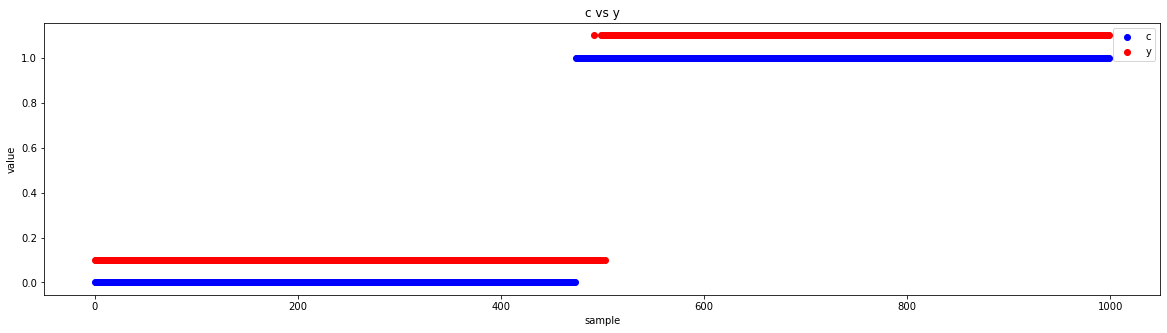

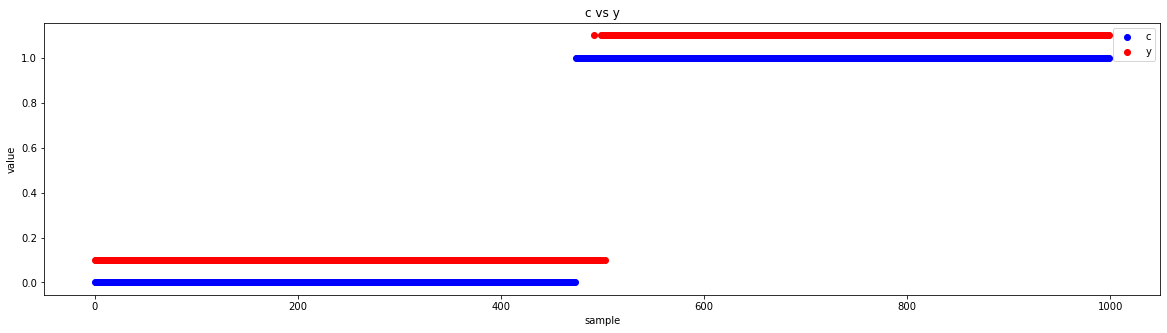

In [6]:
plt.figure(figsize=(20,5))
plt.title('c vs y')
plt.plot(c_batch.flatten(),'bo', label="c")
plt.plot(y_label.flatten(),'ro', label="y")
plt.xlabel("sample")
plt.ylabel("value")
plt.legend()
ymax = plt.ylim()[1]
plt.show()


c_sorted_idx = np.argsort(c_batch, axis=0) # c indices sorted
sorted_c = c_batch[c_sorted_idx] # c sorted 0-1
sorted_y = y_label[c_sorted_idx] # sort y according to c indices

plt.figure(figsize=(20,5))
plt.title('c vs y')
plt.plot(sorted_c.flatten(),'bo', label="c")
plt.plot(sorted_y.flatten(),'ro', label="y")
plt.xlabel("sample")
plt.ylabel("value")
plt.legend()
ymax = plt.ylim()[1]
plt.show()

# split by 0.5
plt.figure(figsize=(20,5))
plt.title('c vs y')
plt.plot(np.round(sorted_c.flatten()),'bo', label="c")
plt.plot(np.round(sorted_y.flatten())+0.1,'ro', label="y")
plt.xlabel("sample")
plt.ylabel("value")
plt.legend()
ymax = plt.ylim()[1]
plt.show()
# split by y_mean
sorted_y_ = np.copy(sorted_y)
y_mean = np.mean(sorted_y)
sorted_y_[sorted_y>y_mean] = 1
sorted_y_[sorted_y<y_mean] = 0

plt.figure(figsize=(20,5))
plt.title('c vs y')
plt.plot(np.round(sorted_c.flatten()),'bo', label="c")
plt.plot(np.round(sorted_y_.flatten())+0.1,'ro', label="y")
plt.xlabel("sample")
plt.ylabel("value")
plt.legend()
ymax = plt.ylim()[1]
plt.show()

In [7]:
# accuracy per class
n_c1 = len(sorted_c[sorted_c>0.5])
n_c0 = len(sorted_c[sorted_c<0.5])
n_y1 = len(sorted_y_[sorted_y_>y_mean])
n_y0 = len(sorted_y_[sorted_y_<y_mean])

print( n_c1, n_c0, n_y1, n_y0 )
acc0 = 1- (n_c0 - n_y0) / n_c0
acc1 = 1- (n_c1 - n_y1) / n_c1
print(acc0 , acc1)

526 474 501 499
1.0527426160337552 0.9524714828897338


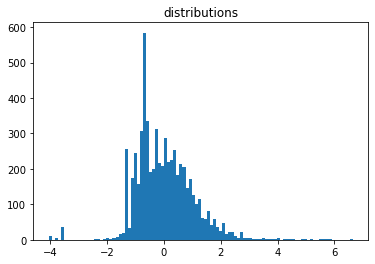

In [8]:
plt.hist(X.flatten(), 100)
# plt.hist(generated_features.flatten(), 100)

plt.title('distributions')
plt.show()

In [9]:
# Are there any conclusions you can draw?
# Were you more successful for a specific class of samples than another? 
# Were you more successful for a specific range of confidence scores?
# Did your model suffer from mode collapse or other problems that may have prevented it from generating more effective samples?
# If so, in what cases? Elaborate

# Answers 
# The random Forrest clf on diabetes data provided a 72% on test (82% on class 0 and 52% on class 1) and 100% on train (overfit)
# This low clf accuracy score impacts the ability of the gan to generate good data 
# even with low accuracy scores we can see the results of the adversarial gan in this scenario did quite well.
# we generated 1000 random values U(0,1) to recieve 1000 vectors from the trained generator and fed them to the disc to get their y values from the BB
# To compare the c (input) and y (output) we first sorted c from 0 to 1 and the corresponding y values accordingly. 
# We can see a trend where y follows c in a low/high value 
# since we use "tanh" in the generator we are not accurately sythesizing the distribution of the training data which is N(0,1) due to the standard scaler we inforced. 
# Therefore, we rounded the c and y probabilities to 0 and 1 to calculate the accuracy of each class which is more interesting in the classification task rather than probabilities.
# we can see that in the diabetes case we are getting 96% accuracy in class 1 and 100% in class 0 
#
#
#
#
